# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from dotenv import load_dotenv

# Import API key
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
open_weather_api_key = os.getenv("open_weather_api_key")
type(open_weather_api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# initialize lists to hold data from api call
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={open_weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : mataura
Processing Record 2 of Set 1 : muroto
Processing Record 3 of Set 1 : calvinia
Processing Record 4 of Set 1 : guozhen
Processing Record 5 of Set 1 : khatanga
Processing Record 6 of Set 1 : lorengau
Processing Record 7 of Set 1 : albany
City not found. Skipping...
Processing Record 8 of Set 1 : nhulunbuy
Processing Record 9 of Set 1 : itarema
Processing Record 10 of Set 1 : bredasdorp
Processing Record 11 of Set 1 : bambous virieux
Processing Record 12 of Set 1 : gat
Processing Record 13 of Set 1 : port elizabeth
Processing Record 14 of Set 1 : qaanaaq
Processing Record 15 of Set 1 : kavieng
Processing Record 16 of Set 1 : torbay
Processing Record 17 of Set 1 : rikitea
Processing Record 18 of Set 1 : yellowknife
Processing Record 19 of Set 1 : port augusta
Processing Record 20 of Set 1 : kapaa
Processing Record 21 of Set 1 : honningsvag
City not found. Skipping...
Processing Record 22 of Set 1 

Processing Record 33 of Set 4 : isangel
Processing Record 34 of Set 4 : mufumbwe
Processing Record 35 of Set 4 : arlit
Processing Record 36 of Set 4 : bengkulu
Processing Record 37 of Set 4 : toora-khem
Processing Record 38 of Set 4 : chernyshevskiy
Processing Record 39 of Set 4 : lyngseidet
Processing Record 40 of Set 4 : kyabe
Processing Record 41 of Set 4 : ndele
Processing Record 42 of Set 4 : alcaniz
Processing Record 43 of Set 4 : bitung
Processing Record 44 of Set 4 : port alfred
Processing Record 45 of Set 4 : waingapu
Processing Record 46 of Set 4 : timra
Processing Record 47 of Set 4 : biak
Processing Record 48 of Set 4 : hervey bay
Processing Record 49 of Set 4 : susuman
Processing Record 50 of Set 4 : marystown
Processing Record 0 of Set 5 : imeni poliny osipenko
City not found. Skipping...
Processing Record 1 of Set 5 : esfarayen
Processing Record 2 of Set 5 : tura
Processing Record 3 of Set 5 : lompoc
Processing Record 4 of Set 5 : fayaoue
Processing Record 5 of Set 5 : p

Processing Record 18 of Set 8 : avera
Processing Record 19 of Set 8 : soyo
Processing Record 20 of Set 8 : kavaratti
Processing Record 21 of Set 8 : saint-augustin
Processing Record 22 of Set 8 : kruisfontein
Processing Record 23 of Set 8 : calama
Processing Record 24 of Set 8 : balykshi
Processing Record 25 of Set 8 : chester
Processing Record 26 of Set 8 : leshan
Processing Record 27 of Set 8 : georgetown
City not found. Skipping...
Processing Record 28 of Set 8 : bubaque
Processing Record 29 of Set 8 : kota belud
Processing Record 30 of Set 8 : yerky
Processing Record 31 of Set 8 : necochea
Processing Record 32 of Set 8 : galle
Processing Record 33 of Set 8 : madaba
City not found. Skipping...
City not found. Skipping...
Processing Record 34 of Set 8 : karaton
Processing Record 35 of Set 8 : marijampole
Processing Record 36 of Set 8 : mapastepec
Processing Record 37 of Set 8 : yulara
Processing Record 38 of Set 8 : miramar
Processing Record 39 of Set 8 : mangit
Processing Record 40 

Processing Record 50 of Set 11 : beira
Processing Record 0 of Set 12 : tangwani
Processing Record 1 of Set 12 : general roca
Processing Record 2 of Set 12 : nakhodka
Processing Record 3 of Set 12 : kyshtovka
Processing Record 4 of Set 12 : najran
Processing Record 5 of Set 12 : hornepayne
City not found. Skipping...
Processing Record 6 of Set 12 : champerico
Processing Record 7 of Set 12 : udachnyy
-----------------------------
Data Retrieval Complete
-----------------------------


In [4]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})
weather_dict.count()

City          568
Cloudiness    568
Country       568
Date          568
Humidity      568
Lat           568
Lng           568
Max Temp      568
Wind Speed    568
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Save city data into a csv file
weather_dict.to_csv("output_data/cities.csv", index = False)
weather_dict.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,100,NZ,1629950135,93,-46.1927,168.8643,46.47,6.62
1,Muroto-misakicho,100,JP,1629950136,84,33.2833,134.1500,82.44,10.20
2,Calvinia,3,ZA,1629950136,78,-31.4707,19.7760,44.85,6.42
3,Guozhen,100,CN,1629950137,33,34.3659,107.3590,83.08,0.13
4,Khatanga,100,RU,1629950137,72,71.9667,102.5000,38.91,11.36


In [6]:
# convert dictionary to dataframe and use .query to find cities with humidity > 99% 
weather_df = pd.DataFrame(weather_dict)
#weather_df.head()
humidity_df = weather_df.query('Humidity > 100')
humidity_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

#### I found there are no cities with humidity > 100% 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

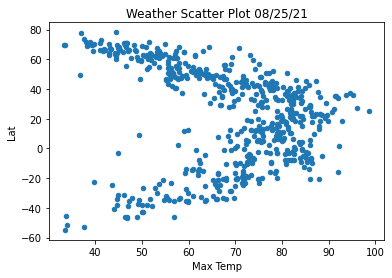

In [7]:
#Latitude vs Temperature

da= (time.strftime('Weather Scatter Plot %m/%d/%y'))        
weather_df.plot(kind='scatter',x='Max Temp', y='Lat',title=da )
pass


## Latitude vs. Humidity Plot

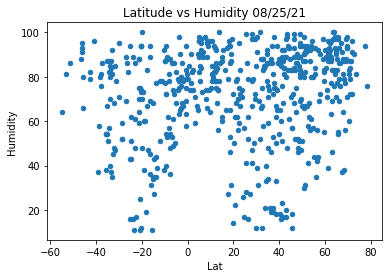

In [8]:
da=time.strftime('Latitude vs Humidity %m/%d/%y')
weather_df.columns
weather_df.plot(kind='scatter',x='Lat',y='Humidity',title=da)
pass

## Latitude vs. Cloudiness Plot

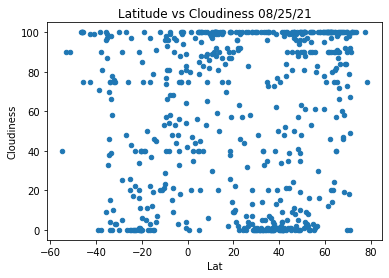

In [9]:
da=time.strftime('Latitude vs Cloudiness %m/%d/%y')
weather_df.plot(kind='scatter',x='Lat',y='Cloudiness',title = da)
pass

## Latitude vs. Wind Speed Plot

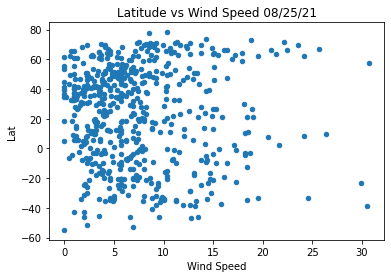

In [10]:
da=time.strftime('Latitude vs Wind Speed %m/%d/%y')
weather_df.plot(kind='scatter',x='Wind Speed',y='Lat',title=da)
pass

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_df = weather_dict.loc[weather_dict["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

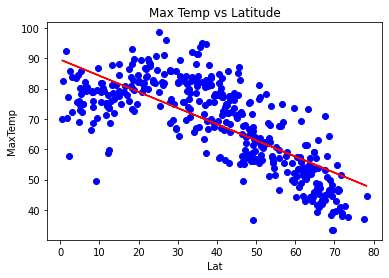

In [12]:

x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
# use lineregress to calculate a least-squares regression for two sets of measurements
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue,pvalue,sterr) = linregress(x_values, y_values)

regression_values = x_values * slope + intercept

plt.plot(x_values,y_values,'o',color='blue')
plt.plot(x_values,regression_values,'r')
#label='Max Temp vs Latitude',

plt.xlabel('Lat')
plt.ylabel('MaxTemp')
plt.title('Max Temp vs Latitude')
plt.show()
pass

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

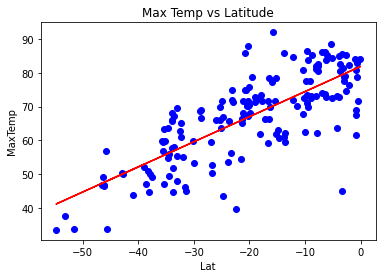

In [15]:
southern_df
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
# use lineregress to calculate a least-squares regression for two sets of measurements
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue,pvalue,sterr) = linregress(x_values, y_values)

regression_values = x_values * slope + intercept

plt.plot(x_values,y_values,'o',color='blue')
plt.plot(x_values,regression_values,'r')
#label='Max Temp vs Latitude',

plt.xlabel('Lat')
plt.ylabel('MaxTemp')
plt.title('Max Temp vs Latitude')
plt.show()
pass

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:

x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
# use lineregress to calculate a least-squares regression for two sets of measurements
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue,pvalue,sterr) = linregress(x_values, y_values)

regression_values = x_values * slope + intercept

plt.plot(x_values,y_values,'o',color='blue')
plt.plot(x_values,regression_values,'r')

plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Humidity vs Latitude - Northern Hemisphere')
plt.show()
pass

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:

x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
# use lineregress to calculate a least-squares regression for two sets of measurements
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue,pvalue,sterr) = linregress(x_values, y_values)

regression_values = x_values * slope + intercept

plt.plot(x_values,y_values,'o',color='blue')
plt.plot(x_values,regression_values,'r')

plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Humidity vs Latitude - Southern Hemisphere')
plt.show()
pass

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:

x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
# use lineregress to calculate a least-squares regression for two sets of measurements
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue,pvalue,sterr) = linregress(x_values, y_values)

regression_values = x_values * slope + intercept

plt.plot(x_values,y_values,'o',color='blue')
plt.plot(x_values,regression_values,'r')

plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs Latitude - Northern Hemisphere')
plt.show()
pass

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:

x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
# use lineregress to calculate a least-squares regression for two sets of measurements
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue,pvalue,sterr) = linregress(x_values, y_values)

regression_values = x_values * slope + intercept

plt.plot(x_values,y_values,'o',color='blue')
plt.plot(x_values,regression_values,'r')

plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs Latitude - Southern Hemisphere')
plt.show()
pass

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:

x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
# use lineregress to calculate a least-squares regression for two sets of measurements
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue,pvalue,sterr) = linregress(x_values, y_values)

regression_values = x_values * slope + intercept

plt.plot(x_values,y_values,'o',color='blue')
plt.plot(x_values,regression_values,'r')

plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs Latitude - Northern Hemisphere')
plt.show()
pass

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:

x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
# use lineregress to calculate a least-squares regression for two sets of measurements
# https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue,pvalue,sterr) = linregress(x_values, y_values)

regression_values = x_values * slope + intercept

plt.plot(x_values,y_values,'o',color='blue')
plt.plot(x_values,regression_values,'r')

plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs Latitude - Southern Hemisphere')
plt.show()
pass